In [1]:
import numpy as np
import pandas as pd
import pickle
import time

from sklearn.model_selection import train_test_split

from text_models import TextClassifier, extract_text_blocks, tokenize_data, load_glove_embedding
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

import sys

def progress_bar(i, total):
    line_end = ""
    if i == total:
        line_end = "\n"
        
    size = 40
    x = int(round(size*i/total))
    text = '\rStatus: [%s] %d/%d %s' % ("#"*x + "."*(size-x), i, total, line_end)
    sys.stdout.write(text)
    sys.stdout.flush()

# Load Dataset 

The dataset is a pandas dataframe with two columns: Text labels and the text sentences and sub-sentences. There are 8 different categories(labels) in total. Each sentence could also have multiple categories(labels) associated with it.

In [3]:
df = pickle.load( open( "review_labelled.pkl", "rb" ))

In [4]:
df.tail

<bound method NDFrame.tail of                                                    label  \
16                            [Job Security/Advancement]   
149    [Job Security/Advancement, business_vision_com...   
220                           [Job Security/Advancement]   
233                           [Job Security/Advancement]   
396                           [Job Security/Advancement]   
...                                                  ...   
48187                           [wlb_working_conditions]   
48198                           [wlb_working_conditions]   
48201                           [wlb_working_conditions]   
48218                           [wlb_working_conditions]   
48290                           [wlb_working_conditions]   

                                   pp_sent  
16                  developing your skills  
149                        rapidly growing  
220      easy to get your foot in the door  
233            opportunity for advancement  
396                  car

# Train LSTM

Train a Multilabel text classifier using LSTM. This model has the following architecture: <br>
Input -> Word Embedding Layer -> LSTM -> Spatial Dropout -> Fully Connected -> RELU -> Fully Connected -> Sigmoid <br>
Here the LSTM output to the next fully connected layer is from the last time step only. All the model implementations could be found at text_models.py

In [7]:
X, y, tokenizer, label_index = tokenize_data(df['pp_sent'].values, df['label'])
model_lstm = TextClassifier(tokenizer, label_index)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

history_lstm = model_lstm.train(X_train, y_train, 'LSTM')
model_lstm.model.summary()

Shape of data tensor: (8000,)
Found 3796 unique tokens.
Train on 4824 samples, validate on 536 samples
Epoch 1/5
4824/4824 [==============================] - 85s 18ms/sample - loss: 0.4341 - categorical_accuracy: 0.1447 - val_loss: 0.3856 - val_categorical_accuracy: 0.1903
Epoch 2/5
4824/4824 [==============================] - 73s 15ms/sample - loss: 0.3616 - categorical_accuracy: 0.3327 - val_loss: 0.3113 - val_categorical_accuracy: 0.4590
Epoch 3/5
4824/4824 [==============================] - 71s 15ms/sample - loss: 0.2576 - categorical_accuracy: 0.6180 - val_loss: 0.1978 - val_categorical_accuracy: 0.7966
Epoch 4/5
4824/4824 [==============================] - 66s 14ms/sample - loss: 0.1659 - categorical_accuracy: 0.8122 - val_loss: 0.1190 - val_categorical_accuracy: 0.8750
Epoch 5/5
4824/4824 [==============================] - 61s 13ms/sample - loss: 0.0961 - categorical_accuracy: 0.8947 - val_loss: 0.0839 - val_categorical_accuracy: 0.8974
Model: "sequential_100"
__________________

Evaluate Model

In [8]:
test_loss, test_acc = model_lstm.evaluate(X_test,y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

2640/2640 [==============================] - 13s 5ms/sample - loss: 0.1018 - categorical_accuracy: 0.8746
Test Loss: 0.1018109659353892
Test Accuracy: 0.8746212124824524


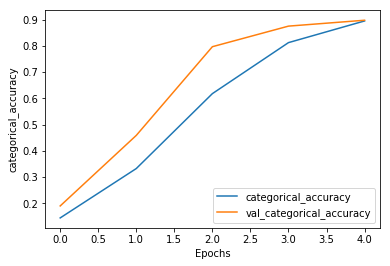

In [9]:
plot_graphs(history_lstm, 'categorical_accuracy')

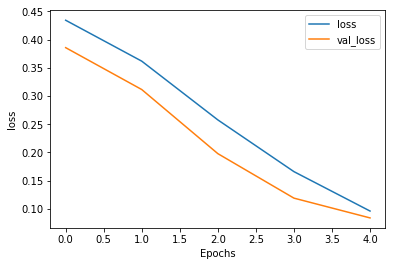

In [10]:
plot_graphs(history_lstm, 'loss')

# Train CNN

Model Architecture: <br> Input -> Word Embedding Layer -> Convolution Layer -> RELU -> Global Max Pool -> Fully Connected -> Sigmoid 

In [11]:
X, y, tokenizer, label_index = tokenize_data(df['pp_sent'].values, df['label'])
model_cnn = TextClassifier(tokenizer, label_index)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

history_cnn = model_cnn.train(X_train, y_train, 'CNN')
model_cnn.model.summary()

Shape of data tensor: (8000,)
Found 3796 unique tokens.
Train on 4824 samples, validate on 536 samples
Epoch 1/5
4824/4824 [==============================] - 4s 765us/sample - loss: 0.4433 - categorical_accuracy: 0.2929 - val_loss: 0.3423 - val_categorical_accuracy: 0.5709
Epoch 2/5
4824/4824 [==============================] - 3s 694us/sample - loss: 0.2434 - categorical_accuracy: 0.7765 - val_loss: 0.1248 - val_categorical_accuracy: 0.8955
Epoch 3/5
4824/4824 [==============================] - 3s 690us/sample - loss: 0.0695 - categorical_accuracy: 0.9295 - val_loss: 0.0481 - val_categorical_accuracy: 0.9459
Epoch 4/5
4824/4824 [==============================] - 3s 697us/sample - loss: 0.0295 - categorical_accuracy: 0.9521 - val_loss: 0.0319 - val_categorical_accuracy: 0.9608
Epoch 5/5
4824/4824 [==============================] - 3s 706us/sample - loss: 0.0165 - categorical_accuracy: 0.9639 - val_loss: 0.0253 - val_categorical_accuracy: 0.9627
Model: "sequential_101"
__________________

Evaluate CNN Model

In [12]:
test_loss, test_acc = model_cnn.evaluate(X_test,y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

2640/2640 [==============================] - 1s 198us/sample - loss: 0.0284 - categorical_accuracy: 0.9504
Test Loss: 0.0284207599576224
Test Accuracy: 0.9503787755966187


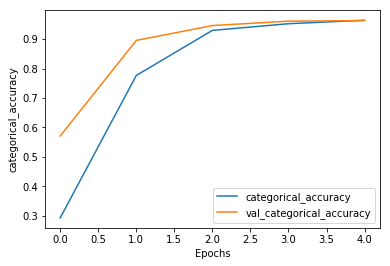

In [13]:
plot_graphs(history_cnn, 'categorical_accuracy')

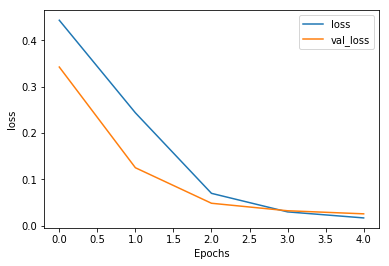

In [14]:
plot_graphs(history_cnn, 'loss')

# Train CNN Glove

Model Architecture: 
Input -> GLoVe Word Embedding(Non trainable)  -> Convolution Layer -> RELU -> Global Max Pool -> Fully Connected -> Sigmoid

In [15]:
X, y, tokenizer, label_index = tokenize_data(df['pp_sent'].values, df['label'])
model_cnn_glove = TextClassifier(tokenizer, label_index)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

history_cnn_glove = model_cnn_glove.train(X_train, y_train, 'CNN_Glove')
model_cnn_glove.model.summary()

Shape of data tensor: (8000,)
Found 3796 unique tokens.
Train on 4824 samples, validate on 536 samples
Epoch 1/5
4824/4824 [==============================] - 4s 764us/sample - loss: 0.2830 - categorical_accuracy: 0.6592 - val_loss: 0.1557 - val_categorical_accuracy: 0.8526
Epoch 2/5
4824/4824 [==============================] - 4s 733us/sample - loss: 0.1215 - categorical_accuracy: 0.8590 - val_loss: 0.1019 - val_categorical_accuracy: 0.8769
Epoch 3/5
4824/4824 [==============================] - 3s 682us/sample - loss: 0.0800 - categorical_accuracy: 0.9104 - val_loss: 0.0755 - val_categorical_accuracy: 0.9142
Epoch 4/5
4824/4824 [==============================] - 3s 688us/sample - loss: 0.0574 - categorical_accuracy: 0.9349 - val_loss: 0.0627 - val_categorical_accuracy: 0.9254
Epoch 5/5
4824/4824 [==============================] - 3s 709us/sample - loss: 0.0425 - categorical_accuracy: 0.9490 - val_loss: 0.0546 - val_categorical_accuracy: 0.9272
Model: "sequential_102"
__________________

Evaluate Glove Model

In [16]:
test_loss, test_acc = model_cnn_glove.evaluate(X_test,y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

2640/2640 [==============================] - 1s 228us/sample - loss: 0.0598 - categorical_accuracy: 0.9182
Test Loss: 0.059801934614326015
Test Accuracy: 0.918181836605072


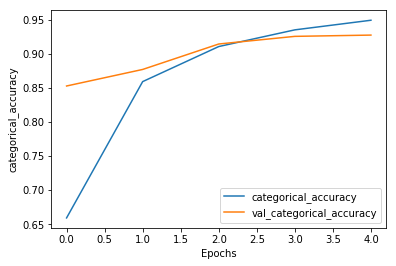

In [17]:
plot_graphs(history_cnn_glove, 'categorical_accuracy')

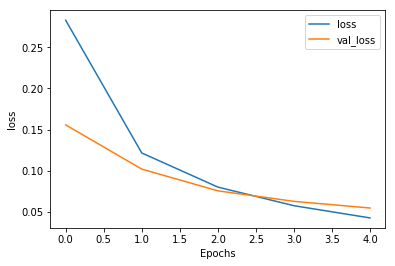

In [18]:
plot_graphs(history_cnn_glove, 'loss')

# Train MLP

Model Architecture: <br>
Input -> Word Embedding Layer -> 4x(Fully Connected -> RELU) -> Fully Connected -> Sigmoid <br>

In [19]:
X, y, tokenizer, label_index = tokenize_data(df['pp_sent'].values, df['label'])
model_mlp = TextClassifier(tokenizer, label_index)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

history_mlp = model_mlp.train(X_train, y_train, 'MLP')
model_mlp.model.summary()

Shape of data tensor: (8000,)
Found 3796 unique tokens.
Train on 4824 samples, validate on 536 samples
Epoch 1/5
4824/4824 [==============================] - 3s 524us/sample - loss: 3.1290 - categorical_accuracy: 0.1360 - val_loss: 1.0086 - val_categorical_accuracy: 0.1959
Epoch 2/5
4824/4824 [==============================] - 2s 372us/sample - loss: 1.0360 - categorical_accuracy: 0.1499 - val_loss: 0.8491 - val_categorical_accuracy: 0.1325
Epoch 3/5
4824/4824 [==============================] - 2s 337us/sample - loss: 0.8152 - categorical_accuracy: 0.1519 - val_loss: 0.7473 - val_categorical_accuracy: 0.1287
Epoch 4/5
4824/4824 [==============================] - 2s 335us/sample - loss: 0.7133 - categorical_accuracy: 0.1401 - val_loss: 0.6454 - val_categorical_accuracy: 0.1194
Epoch 5/5
4824/4824 [==============================] - 2s 333us/sample - loss: 0.6347 - categorical_accuracy: 0.1347 - val_loss: 0.6051 - val_categorical_accuracy: 0.1343
Model: "sequential_103"
__________________

Evaluate MLP Model

In [20]:
test_loss, test_acc = model_mlp.evaluate(X_test,y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

2640/2640 [==============================] - 0s 119us/sample - loss: 0.6056 - categorical_accuracy: 0.1375
Test Loss: 0.6056281544945457
Test Accuracy: 0.13750000298023224


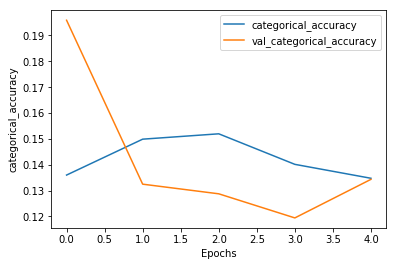

In [21]:
plot_graphs(history_mlp, 'categorical_accuracy')

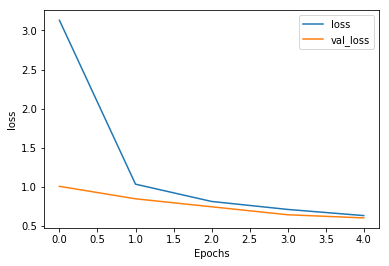

In [22]:
plot_graphs(history_mlp, 'loss')

The cross_validation function iterates over different hyper parameter settings to find the best model configuration.

In [5]:
def cross_validation(model_type, X_train, y_train, tokenizer, label_index):

    learning_rates = np.linspace(1e-3, 5e-4, 5)
    regularization_strengths = np.linspace(0.001, 1.5, 5)

    best_val = -1.
    best_train = -1
    best_model = None
    best_lr = None
    best_reg = None
    progress_counter = 0
    total_tests = learning_rates.shape[0] * regularization_strengths.shape[0]

    print('Cross validation : ', model_type)
    
    start_time = time.time()
    
    for lr in learning_rates:
        for reg in regularization_strengths:
            # Train the network
            model = TextClassifier(tokenizer, label_index, verbose=0)
            history = model.train(X_train, y_train, model_type, learning_rate=lr, regularization=reg)
            val_acc_history = history.history['val_categorical_accuracy']
            val_acc = val_acc_history[-1]

            if val_acc > best_val:
                del best_model
                best_val = val_acc
                best_model = model
                best_lr = lr
                best_reg = reg
            else:
                del model
                
            progress_counter += 1    
            progress_bar(progress_counter, total_tests)
            
    best_hist = best_model.history.history
    
    train_acc, val_loss, train_loss = best_hist['categorical_accuracy'][-1], best_hist['val_loss'][-1], best_hist['loss'][-1]

    print("Execution time: %s seconds" % (time.time() - start_time))
    print('Best validation accuracy: %f - Train accuracy: %f - val loss: %f - train loss: %f'
          % (best_val, train_acc, val_loss, train_loss) )
    print('Best learning rate: %f - regularization : %f' % (best_lr, best_reg) )
    return best_model

In [6]:
X, y, tokenizer, label_index = tokenize_data(df['pp_sent'].values, df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

best_lstm = cross_validation("LSTM", X_train, y_train, tokenizer, label_index)
best_mlp = cross_validation("MLP", X_train, y_train, tokenizer, label_index)
best_cnn = cross_validation("CNN", X_train, y_train, tokenizer, label_index)
best_glove = cross_validation("CNN_Glove", X_train, y_train, tokenizer, label_index)

W0213 22:13:55.081820 4770692544 deprecation.py:506] From /Users/kshitijsharma/Documents/CS231n/assignment2/.env/lib/python3.7/site-packages/tensorflow/python/keras/backend.py:4081: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Shape of data tensor: (8000,)
Found 3796 unique tokens.
Cross validation :  LSTM
Status: [########################################] 25/25 
Execution time: 2434.6260030269623 seconds
Best validation accuracy: 0.921642 - Train accuracy: 0.892828 - val loss: 0.072884 - train loss: 0.103731
Best learning rate: 0.000750 - regularization : 0.750500
Cross validation :  MLP
Status: [########################################] 25/25 
Execution time: 360.67141103744507 seconds
Best validation accuracy: 0.212687 - Train accuracy: 0.155473 - val loss: 0.451730 - train loss: 0.513213
Best learning rate: 0.000625 - regularization : 1.500000
Cross validation :  CNN
Status: [########################################] 25/25 
Execution time: 371.75189566612244 seconds
Best validation accuracy: 0.962687 - Train accuracy: 0.962687 - val loss: 0.027080 - train loss: 0.015812
Best learning rate: 0.001000 - regularization : 0.375750
Cross validation :  CNN_Glove
Status: [########################################

CNN seems to perform best amongst all the other models.
<br> 
CNN with GLoVe embedding is also slightly slower than CNN(with learnt embedding) while not performing any better.<br>
LSTM was approximately 7 times slower than CNN and also didn't perform any better than CNN. 
<br>
MLP was expected to perform the worst as by design it has no temporal memory. 
<br><br>
Evaluating Test Accuracies on the best models after cross validation and hyper parameter tuning. 

In [23]:
test_loss, test_acc = best_cnn.evaluate(X_test,y_test)
print('CNN: Test Loss: {}'.format(test_loss))
print('CNN: Test Accuracy: {}'.format(test_acc))

test_loss, test_acc = best_glove.evaluate(X_test,y_test)
print('CNN Glove: Test Loss: {}'.format(test_loss))
print('CNN Glove: Test Accuracy: {}'.format(test_acc))

test_loss, test_acc = best_lstm.evaluate(X_test,y_test)
print('LSTM: Test Loss: {}'.format(test_loss))
print('LSTM: Test Accuracy: {}'.format(test_acc))

test_loss, test_acc = best_mlp.evaluate(X_test,y_test)
print('MLP: Test Loss: {}'.format(test_loss))
print('MLP: Test Accuracy: {}'.format(test_acc))

2640/2640 [==============================] - 1s 198us/sample - loss: 0.0302 - categorical_accuracy: 0.9489
CNN: Test Loss: 0.030218892572729878
CNN: Test Accuracy: 0.9488636255264282
2640/2640 [==============================] - 1s 223us/sample - loss: 0.0587 - categorical_accuracy: 0.9212
CNN Glove: Test Loss: 0.05871308545271556
CNN Glove: Test Accuracy: 0.9212121367454529
2640/2640 [==============================] - 10s 4ms/sample - loss: 0.0871 - categorical_accuracy: 0.8905
LSTM: Test Loss: 0.08712125434116884
LSTM: Test Accuracy: 0.8905302882194519
2640/2640 [==============================] - 0s 119us/sample - loss: 0.4533 - categorical_accuracy: 0.2125
MLP: Test Loss: 0.45326672810496704
MLP: Test Accuracy: 0.21250000596046448


The below code block loads a review, splits it into sentences and sub-sentences, and returns a flattened list

In [24]:
data_pros_cons = pickle.load( open( "review_pros_cons.pkl", "rb" ))
review = data_pros_cons.iloc[10,0]
blocks = extract_text_blocks(review)

Text example

In [25]:
print(review)

I worked for the internal marketing team (MarCom) on the creative side. The best thing about working at Apple is your coworkers. They do an excellent job of hiring incredibly intelligent, talented people. It's quite humbling to work alongside such accomplished people. You'll always feel like the dumbest person in the room, which is great because everyone has so much to teach you. Most of them are ego-free (about 70% of them) and will help you whenever possible. There are so many personality types, though nearly all of them are perfectionist Type A people. If that is your kind of crew, you'll do well.

The work usually comes in waves. When you're on, you're all the way on. For weeks at a time you can expect late nights and no weekends. On the flip side, when it's slow, it's very slow. You can often work from home or take comp days. During downtimes it is not uncommon to go in for five hours including a long lunch and then go home.

In addition to this, the compensation is good. The stoc

In [26]:
# Helper function to print sentences and categories from the prediction list
def print_categories_sentences(prediction_dict):
    
    if len(prediction_dict) == 0:
        print ("No predictions made")
        
    for k,v in predictions.items():
        categories = [i[1] for i in v[0]]
        sentence = v[1]
        print(categories, sentence)

# Predict

The predict function takes in a list of important text blocks as input, and returns a list of "useful/important" sentences with their categories and confidence values. <br>
Below we visualize the outputs of the 4 models on the text above(review).

# CNN

In [27]:
predictions = best_cnn.predict(blocks)
print_categories_sentences(predictions)

['Job Security/Advancement'] I worked for the internal marketing team (MarCom) on the creative side.
['culture_team'] They do an excellent job of hiring incredibly intelligent, talented people.
['wlb_working_conditions'] The work usually comes in waves.
['wlb_working_conditions'] For weeks at a time you can expect late nights and no weekends.
['culture_team'] On the flip side, when it's slow, it's very slow.
['wlb_working_conditions'] You can often work from home or take comp days.
['wlb_working_conditions'] During downtimes it is not uncommon to go in for five hours including a long lunch and then go home.
['salary_benefits'] In addition to this, the compensation is good.
['salary_benefits'] The stock program is okay.
['culture_team'] Finally, Tim Cook seems like a genuinely good person.


# CNN Glove

In [28]:
predictions = best_glove.predict(blocks)
print_categories_sentences(predictions)

['culture_team'] They do an excellent job of hiring incredibly intelligent, talented people.
['wlb_working_conditions'] The work usually comes in waves.
['wlb_working_conditions'] For weeks at a time you can expect late nights and no weekends.
['wlb_working_conditions'] You can often work from home or take comp days.
['salary_benefits'] The stock program is okay.


# LSTM

In [29]:
predictions = best_lstm.predict(blocks)
print_categories_sentences(predictions)

['culture_team'] The best thing about working at Apple is your coworkers.
['culture_team'] They do an excellent job of hiring incredibly intelligent, talented people.
['business_vision_competitors'] You'll always feel like the dumbest person in the room, which is great because everyone has so much to teach you.
['wlb_working_conditions'] You can often work from home or take comp days.
['salary_benefits'] During downtimes it is not uncommon to go in for five hours including a long lunch and then go home.
['salary_benefits'] But the pay is more than fair and their annual reviews pretty much guarantee a raise, bonus, and/or more stock.


# MLP

In [30]:
predictions = best_mlp.predict(blocks)
print_categories_sentences(predictions)

No predictions made
